In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64,64,3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/home/kazi/sketches_png/png3/train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/home/kazi/sketches_png/png3/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

from IPython.display import display
from PIL import Image

classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 800)

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/1
8000/8000 [==============================] - 404s 51ms/step - loss: 0.0128 - acc: 0.9955 - val_loss: 0.1994 - val_acc: 0.9750


In [15]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('random.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] >= 0.5:
    prediction = 'alarm clock'
else:
    prediction = 'airplane'
    
print(prediction)

alarm clock


In [11]:
result[1][0]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [9]:
training_set.class_indices

{'airplane': 0, 'alarm clock': 1}

In [13]:
result

array([[0.]], dtype=float32)

In [16]:
#################### multilabel

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64,64,3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 28, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/home/kazi/sketches_png/png2/train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/home/kazi/sketches_png/png2/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

from IPython.display import display
from PIL import Image

classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 800)

Found 2240 images belonging to 28 classes.
Found 560 images belonging to 28 classes.
Epoch 1/1
8000/8000 [==============================] - 863s 108ms/step - loss: 0.6722 - acc: 0.7997 - val_loss: 0.0549 - val_acc: 0.9804


In [27]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('random1.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
training_set.class_indices

{'airplane': 0,
 'alarm clock': 1,
 'angel': 2,
 'ant': 3,
 'apple': 4,
 'arm': 5,
 'armchair': 6,
 'ashtray': 7,
 'axe': 8,
 'backpack': 9,
 'banana': 10,
 'barn': 11,
 'baseball bat': 12,
 'basket': 13,
 'bathtub': 14,
 'bear (animal)': 15,
 'bed': 16,
 'bee': 17,
 'beer-mug': 18,
 'bell': 19,
 'bench': 20,
 'bicycle': 21,
 'binoculars': 22,
 'blimp': 23,
 'book': 24,
 'bookshelf': 25,
 'boomerang': 26,
 'bottle opener': 27}

In [25]:
result[0][2]


0.0

In [28]:
display(result)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
idxarr = result.argmax(axis=1)
index = idxarr[0]

0

In [57]:
type(training_set.class_indices)
prediction = []


In [58]:
for key, indexx in training_set.class_indices.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if indexx == index:
        prediction = key
        print(key)
        

airplane


In [59]:
key


'bottle opener'

In [60]:
prediction

'airplane'

In [1]:
############# save/ load syntax

from keras.models import load_model

classifier.save('my_model1.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')


Using TensorFlow backend.


NameError: name 'classifier' is not defined

In [3]:
from azure.cognitiveservices.search.imagesearch import ImageSearchAPI
from msrest.authentication import CognitiveServicesCredentials

subscription_key = "4487a9eb07064493aaf5f9648bd4bd25"
search_term = "airplane"

"""
This application will search images on the web with the Bing Image Search API and print out first image result.
"""
#create the image search client
client = ImageSearchAPI(CognitiveServicesCredentials(subscription_key))
# send a search query to the Bing Image Search API
image_results = client.images.search(query=search_term)
print("Searching the web for images of: {}".format(search_term))

# Image results
if image_results.value:
    first_image_result = image_results.value[0]
    print("Total number of images returned: {}".format(len(image_results.value)))
    print("First image thumbnail url: {}".format(first_image_result.thumbnail_url))
    print("First image content url: {}".format(first_image_result.content_url))
else:
    print("Couldn't find image results!")

Searching the web for images of: airplane
Total number of images returned: 35
First image thumbnail url: https://tse2.mm.bing.net/th?id=OIP.cx3AR9WcinW5E5VPU7hXEQHaE8&pid=Api
First image content url: https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Tarom.b737-700.yr-bgg.arp.jpg/1200px-Tarom.b737-700.yr-bgg.arp.jpg


In [12]:
for i in range(9):
    image_url = format(image_results.value[i].thumbnail_url)
    with open('urls.txt', 'a') as the_file:
        the_file.write(image_url + '\n')

In [13]:
from imutils import paths
import argparse
import cv2
import requests, os

path_text = "urls.txt"

o = open(path_text,"r")
url0 = o.read()
o.close()

## list, containing downloaded files 
urls = url0.split()
print("The number of urls: {}".format(len(urls)))
print("____________________________")
for url in urls[:10]:
    print(url)

The number of urls: 17
____________________________
https://tse2.mm.bing.net/th?id=OIP.cx3AR9WcinW5E5VPU7hXEQHaE8&pid=Api
https://tse3.mm.bing.net/th?id=OIP.3Wnj8wQId7vJV-Kn2RtxXgHaEo&pid=Api
https://tse4.mm.bing.net/th?id=OIP.g89uxgcHb2MIfLQNfp5qSQHaEK&pid=Api
https://tse1.mm.bing.net/th?id=OIP.Qtm0zl3ShInRUTZdRIMzJgHaE9&pid=Api
https://tse4.mm.bing.net/th?id=OIP.fUdSRRRLW4X1MSfmTMjQeAHaE8&pid=Api
https://tse4.mm.bing.net/th?id=OIP.rJKdOe63r5_GnWu9b0FszQHaEA&pid=Api
https://tse3.mm.bing.net/th?id=OIP._gxLpa3i7_IPgbjr5aSg1QHaEK&pid=Api
https://tse2.mm.bing.net/th?id=OIP.ndkWC1Q2dVSbmta_3da6sAHaHa&pid=Api
https://tse2.mm.bing.net/th?id=OIP.cx3AR9WcinW5E5VPU7hXEQHaE8&pid=Api
https://tse3.mm.bing.net/th?id=OIP.3Wnj8wQId7vJV-Kn2RtxXgHaEo&pid=Api


In [14]:
import requests,os

prediction = "airplane"

loc_data = "./retrieved_data/" + prediction + "/"
try:
    os.makedirs(loc_data)
except:
    pass
iimage = 0
for url in urls:
    try:
        f = open(loc_data + 'image{:05.0f}.jpg'.format(iimage),'wb')
        f.write(requests.get(url).content)
        f.close()
        iimage += 1
    except Exception as e:
        print("\n{} {}".format(e,url))
        pass

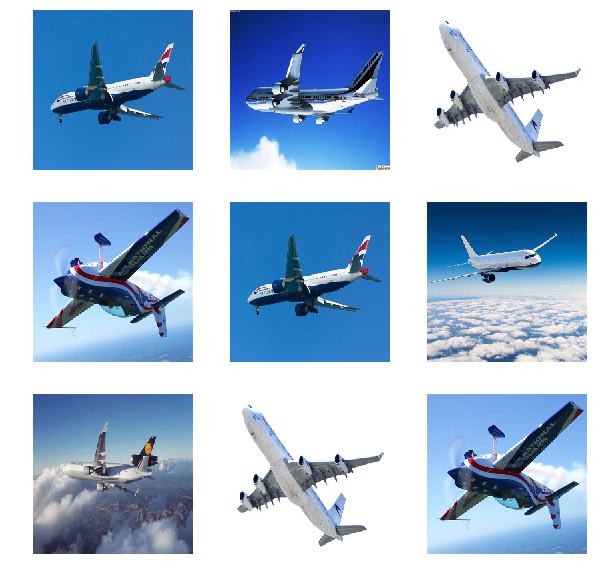

In [15]:
from keras.preprocessing.image import load_img 
import matplotlib.pyplot as plt

fnames = os.listdir(loc_data)
fig = plt.figure(figsize=(10,10))
count = 1
for fnm in fnames[:9]:
    img = load_img(loc_data +fnm,target_size=(400,400))
    ax = fig.add_subplot(3,3,count)
    count += 1
    ax.imshow(img)
    ax.axis("off")
plt.show()